<a href="https://colab.research.google.com/github/Freddy-Y/HDAG-Technical-Deliverable/blob/main/F25_HDAG_Deliverable_Case_Team_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDAG F25 Technical Deliverable - CASE TEAM ANALYST
## Due Date: September 16th, 12:00 PM (NOON)

<div class='header_yellow'>
<hr color=black>

# Instructions
</div>

This take-home assignment is meant to evaluate your background and fit for a role within HDAG. We're interested in learning more about your proficiency in Python, data analysis and presentation skills. The assignment is open internet, and you are encouraged to use online resources; however, you may not consult anyone else while doing the assignment. You are responsible for all of your code, and will be asked about anything you write.

**Please note: You are absolutely not expected to have experience in every area or be able to answer every question, especially in regards to the optional sections. Exceptional analysts have in the past only completed 80% or so of the deliverable.**

Some of the questions may seem open ended or ambiguous. This is a close match for the actual problems we work on with our case teams; we use data to extract meaningful and actionable insights. Do your best to come up with a realistic answer!

## Duration
This assessment is expected to take around 180-240 minutes in total (depending on how long you spend on the open-ended section(s) you choose to complete).

## Submission
Once you have completed all parts of the deliverable, download your code as an `.ipynb` file. Also various questions will ask you to make slides describing your findings: **Make sure to use this slide template for all parts of your presentation: https://docs.google.com/presentation/d/1xMIUYQBUaWpG3Rm4mkIWBOtLVGW4Tsyy/edit?usp=sharing&ouid=104623957706540710269&rtpof=true&sd=true**. These will be the slides you present during the interview and should tell a story about your data analysis process.

Once finished, upload your completed `.ipynb` file and presentation slide deck (as a `.pdf`) to this link: **https://forms.gle/j8N4CDiiY4L8FwjG9**

<hr color=black>

# 1. Data Analysis

This question will allow you to demonstrate ability on analyzing three real-world datasets:

- US international air travel
- Movie ratings
- College incomes

See below for detailed descriptions of each dataset and task. The following sub-questions are roughly in order of increasing difficulty.

In [1]:
# RUN THE FOLLOWING TO CLONE THE DATA REPO
!git clone https://github.com/AnmayG/f24-hdag-data

Cloning into 'f24-hdag-data'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 9.12 MiB | 5.16 MiB/s, done.
Resolving deltas: 100% (2/2), done.


### 1.1.1. Visualization

This question will allow you to demonstrate ability on analyzing a real-world dataset. You will work with a US international air travel dataset. Below is a description of the dataset.

The data comes from the U.S. International Air Passenger and Freight Statistics Report. As part of the T-100 program, USDOT receives traffic reports of US and international airlines operating to and from US airports. There are two datasets available:

Departures: Data on all flights between US gateways and non-US gateways, irrespective of origin and destination.

Each observation provides information on a specific airline for a pair of airports, one in the US and the other outside. Three main columns record the number of flights: Scheduled, Charter, and Total.

Passengers: Data on the total number of passengers for each month and year between a pair of airports, as serviced by a particular airline.

U.S. International Air Passenger and Freight data are confidential for a period of 6 months, after which it can be released. As a result, quarterly reports and the year to date/calendar year raw data files available here will always lag by two quarters.

**Run the code below to load the dataset. Explore the data to gain an understanding of the variables that exist. Then, create a barplot ranking the top 10 busiest airports. Think about how you would define "busiest". Make sure to label the plot axes and give it an appropriate title.**

In [95]:
# Run this command to download the data
import pandas as pd
import matplotlib.pyplot as plt

departure_data = pd.read_csv("f24-hdag-data/International_Report_Departures.csv")
passengers_data = pd.read_csv("f24-hdag-data/International_Report_Passengers.csv")

In [103]:
departure_data.sort_values(by="data_dte", axis=0, ascending=True, ignore_index=True).tail()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
249995,12/01/2019,2019,12,13930,ORD,41,10920,CDG,427,19977,UA,1,Departures,57,0,57
249996,12/01/2019,2019,12,13930,ORD,41,10752,BRU,409,19977,UA,1,Departures,57,0,57
249997,12/01/2019,2019,12,12478,JFK,22,11488,EDI,493,19790,DL,1,Departures,57,0,57
249998,12/01/2019,2019,12,11292,DEN,82,16217,YUL,941,20206,QK,0,Departures,58,0,58
249999,12/01/2019,2019,12,10154,ACK,13,16271,YYZ,936,21437,13Q,0,Departures,0,1,1


In [93]:
#TODO: Create top 10 busiest airports barplot.

busiest_airports = pd.DataFrame()

busiest_airports["Airport"] = pd.concat([
    departure_data["usg_apt"].drop_duplicates(),
    departure_data["fg_apt"].drop_duplicates()]).reset_index(drop=True).drop_duplicates()

busiest_airports["Airport ID"] = pd.concat([
    departure_data["usg_apt_id"].drop_duplicates(),
    departure_data["fg_apt_id"].drop_duplicates()]).reset_index(drop=True).drop_duplicates()

busiest_airports = busiest_airports.sort_values(by="Airport", axis=0, ascending=True, ignore_index=True)
busiest_airports = busiest_airports.set_index("Airport")

scheduled_departure_summary = (
    departure_data.groupby("usg_apt")["Scheduled"].sum()
    .add(departure_data.groupby("fg_apt")["Scheduled"].sum(), fill_value=0)
    .to_frame(name="Scheduled Departures")
)
charter_departure_summary = (
    departure_data.groupby("usg_apt")["Charter"].sum()
    .add(departure_data.groupby("fg_apt")["Charter"].sum(), fill_value=0)
    .to_frame(name="Charter Departures")
)
total_departure_summary = (
    departure_data.groupby("usg_apt")["Total"].sum()
    .add(departure_data.groupby("fg_apt")["Total"].sum(), fill_value=0)
    .to_frame(name="Total Departures")
)

scheduled_passengers_summary = (
    passengers_data.groupby("usg_apt")["Scheduled"].sum()
    .add(passengers_data.groupby("fg_apt")["Scheduled"].sum(), fill_value=0)
    .to_frame(name="Scheduled Passengers")
)
charter_passengers_summary = (
    passengers_data.groupby("usg_apt")["Charter"].sum()
    .add(passengers_data.groupby("fg_apt")["Charter"].sum(), fill_value=0)
    .to_frame(name="Charter Passengers")
)
total_passengers_summary = (
    passengers_data.groupby("usg_apt")["Total"].sum()
    .add(passengers_data.groupby("fg_apt")["Total"].sum(), fill_value=0)
    .to_frame(name="Total Passengers")
)

busiest_airports = pd.concat([
    busiest_airports,
    scheduled_departure_summary,
    charter_departure_summary,
    total_departure_summary,
    scheduled_passengers_summary,
    charter_passengers_summary,
    total_passengers_summary
], axis=1)

for col in busiest_airports.select_dtypes(include="float"):
    busiest_airports[col] = busiest_airports[col].astype("Int64")

In [106]:
top_ten_by_passengers = busiest_airports.sort_values(by="Total Passengers", axis=0, ascending=False).head(10)
top_ten_by_passengers.head(10)

,Airport ID,Scheduled Departures,Charter Departures,Total Departures,Scheduled Passengers,Charter Passengers,Total Passengers
JFK,12478,1001263,19529,1020792,243647607,2145392,245792999
LAX,12892,812284,11174,823458,185289558,804758,186094316
MIA,13303,1228971,122053,1351024,174849214,5996234,180845448
LHR,11164,427575,297,427872,128531257,53899,128585156
ORD,13930,621147,12332,633479,107435066,1599631,109034697
EWR,11618,534750,10020,544770,98343137,834552,99177689
YYZ,11332,1078385,20669,1099054,94820143,2074457,96894600
NRT,15127,350211,4093,354304,95440340,311614,95751954
SFO,14771,368431,3236,371667,93542994,426012,93969006
ATL,10397,422817,4426,427243,80205548,548718,80754266


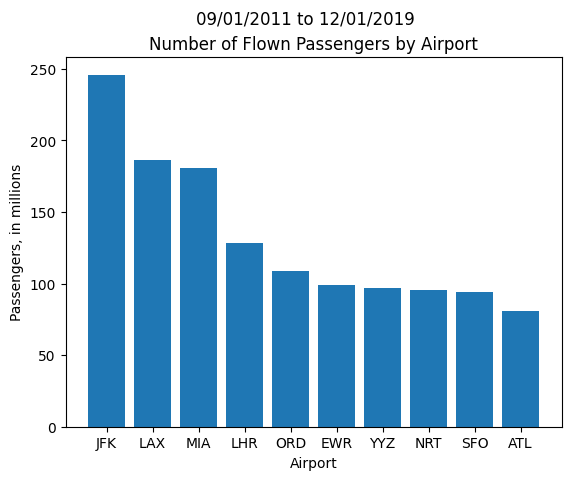

In [114]:
plt.bar(top_ten_by_passengers.index, [x / 1000000 for x in top_ten_by_passengers["Total Passengers"]])
plt.title('Number of Flown Passengers by Airport')
plt.suptitle('09/01/2011 to 12/01/2019')
plt.xlabel('Airport')
plt.ylabel('Flown Passengers, in millions')
plt.show()

In [116]:
top_ten_by_departures = busiest_airports.sort_values(by="Total Departures", axis=0, ascending=False).head(10)
top_ten_by_departures.head(10)

,Airport ID,Scheduled Departures,Charter Departures,Total Departures,Scheduled Passengers,Charter Passengers,Total Passengers
MIA,13303,1228971,122053,1351024,174849214,5996234,180845448
YYZ,11332,1078385,20669,1099054,94820143,2074457,96894600
JFK,12478,1001263,19529,1020792,243647607,2145392,245792999
LAX,12892,812284,11174,823458,185289558,804758,186094316
ORD,13930,621147,12332,633479,107435066,1599631,109034697
EWR,11618,534750,10020,544770,98343137,834552,99177689
IAH,12266,533566,4966,538532,70708610,543577,71252187
MEX,16477,447881,10444,458325,56784809,776998,57561807
LHR,11164,427575,297,427872,128531257,53899,128585156
ATL,10397,422817,4426,427243,80205548,548718,80754266


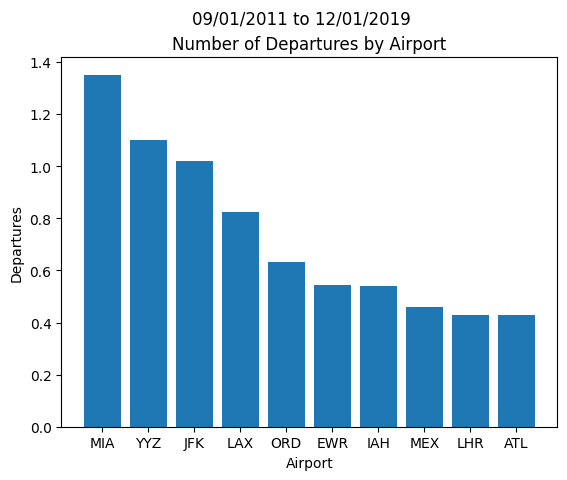

In [117]:
plt.bar(top_ten_by_departures.index, [x / 1000000 for x in top_ten_by_departures["Total Departures"]])
plt.title('Number of Departures by Airport')
plt.suptitle('09/01/2011 to 12/01/2019')
plt.xlabel('Airport')
plt.ylabel('Departures')
plt.show()

### 1.1.2. Open-Ended Data Analysis
**This question will allow you to show your analysis skills.**

Here are some ideas you could potentially explore:

- Time-series analysis
- Map of busiest airports
- Flight paths
- Correlation between deparatures and passengers
- Distribution of larger and smaller airlines
- Regional analysis
- Incorporate outside datasets (population, weather, etc.)

Finally, prepare 1-2 slides presenting the final results of your analysis. You will be asked to explain your process and reasoning in the next interview round.

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

departure_data = pd.read_csv("f24-hdag-data/International_Report_Departures.csv")
passengers_data = pd.read_csv("f24-hdag-data/International_Report_Passengers.csv")

departure_data["Year-Month"] = pd.to_datetime(departure_data["data_dte"]).dt.to_period('M')

departures_over_time = pd.DataFrame()
departures_over_time["Year-Month"] = departure_data["Year-Month"].reset_index(drop=True).drop_duplicates()
departures_over_time["Total Departures"] = departure_data.groupby("Year-Month")["Total"].sum()

departures_over_time.sort_values(by="data_dte", axis=0, ascending=True, ignore_index=True).tail()

# departures_over_time["Total Departures"] = departure_data.groupby("Month")["Total Departures"].sum()
departures_over_time.head(40)

# busiest_airports["Airport"] = pd.concat([
#     departure_data["usg_apt"].drop_duplicates(),
#     departure_data["fg_apt"].drop_duplicates()]).reset_index(drop=True).drop_duplicates()

# busiest_airports["Airport ID"] = pd.concat([
#     departure_data["usg_apt_id"].drop_duplicates(),
#     departure_data["fg_apt_id"].drop_duplicates()]).reset_index(drop=True).drop_duplicates()

# busiest_airports = busiest_airports.sort_values(by="Airport", axis=0, ascending=True, ignore_index=True)
# busiest_airports = busiest_airports.set_index("Airport")

# scheduled_departure_summary = (
#     departure_data.groupby("data_dte")["Scheduled"].sum()
#     .add(departure_data.groupby("fg_apt")["Scheduled"].sum(), fill_value=0)
#     .to_frame(name="Scheduled Departures")
# )

,Year-Month,Total Departures
0,2019-12-01,NaN
3209,2018-12-01,NaN
6501,2017-12-01,NaN
9846,2016-12-01,NaN
13090,2015-12-01,NaN
16245,2014-12-01,NaN
19123,2013-12-01,NaN
21977,2012-12-01,NaN
24602,2011-12-01,NaN
27432,2010-12-01,NaN


### 1.3.1 Machine Learning
This questions tests the following skills: binary prediction/classification (binary), feature engineering, an visualization. **This is a prediction task to determine whether a person makes over $50K a year.**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. This **Adult dataset** provided here contains 14 attributes and one target field, income, which is divided into two classes: <=50K and >50K

Load in the data and import any libraries you might need (e.g. numpy, pandas, sklearn).

In [ ]:
# Run this command to download the data
import pandas as pd
df = pd.read_csv("f24-hdag-data/adult_data.csv")

1. **Handle missing data**. Do you notice any data points that have missing / weird feature values? Describe what you find and make any modifications necessary such that your classifier in question 3 handles these data points correctly.

In [ ]:
# TODO: Handle missing data

2. **Explore the data features.** Make a side-by-side boxplot of the binary income categorization against one of the factors (e.g. age). Comment on any insights from this plot and note any potential outliers or unusual data points.

In [ ]:
# TODO: Visualize

3. **Build a classifier to predict whether an individual's income is greater than or less than $50k.** The following steps might be useful in building and reporting the results of this classifier:
- Data preprocessing: explore missing data, outliers, NULL values, and scale any numeric fields
- Train-test split
- Choose a classification model and implement it.
- Visualize the results of your classifier. *Suggestions: confusion matrix, ROC curve*

In [ ]:
# TODO: Build the classifier

Finally, prepare 1-2 slides presenting your classifier: which model you chose, how you processed data, and some visualizations and final results. You will be asked to explain your process and results in the next interview round.

### 1.3.2 - Dealing with Data Imbalance

Now think about the imbalance in this dataset in the incomes. 70% of incomes are under $50K. Use some techniques that you know to deal with the imbalance in the variable you want to predict. Benchmark how well your class-imbalance-corrected data works versus the vanilla dataset. Discuss, based on your results, whether class-imbalance correction is worth doing. Consider:
- Oversampling and undersampling techniques
- SMOTE sampling.
- Random Forest with Class Weighting.

# Bonus 1. Principal Component Analysis (PCA)

While these question are **completely optional**, exceptional responses will be considered in the deliberations process! If you do complete this question, include **1 slide** on your findings/results from the below questions at the end of your presentation.

In [ ]:
df = pd.read_csv('f24-hdag-data/tmdb_5000_movies.csv')
df.head()

In [ ]:
X = df[['original_title', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average']]
X

In [ ]:
# Standardize the data
# Your code here...

In [ ]:
# Plot the explained variance ratio for each component as a bar plot

# Bonus 2. NLP
**This question will allow you to show your NLP skills. Please perform the following two tasks.**




1) Write a classifier to identify sentiment based on the "label" column! 1 indicates negative, 2 indicates neutral, and 3 indicates positive sentiment.

2) Prepare a short presentation (1-2 slides) explaining the approach you used - what pre-processing, feature extraction, and classification methodologies - and why you used them.



In [ ]:
# Run this command to download the data
import pandas as pd
df = pd.read_csv("f24-hdag-data/twitter_training.csv", encoding="unicode_escape")

In [ ]:
#TODO: your classifier + analysis code goes here!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=117b2bb2-f996-4b6f-b8c3-af3ec0f31b37' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

## As a REMINDER:

### Submission
Once you have completed all parts of the deliverable, download your code as an `.ipynb` file. Also various questions will ask you to make slides describing your findings: **Make sure to use this slide template for all parts of your presentation: https://docs.google.com/presentation/d/1xMIUYQBUaWpG3Rm4mkIWBOtLVGW4Tsyy/edit?usp=sharing&ouid=104623957706540710269&rtpof=true&sd=true**. These will be the slides you present during the interview and should tell a story about your data analysis process.

Once finished, upload your completed `.ipynb` file and presentation slide deck (as a `.pdf`) to this link: **https://forms.gle/j8N4CDiiY4L8FwjG9**